In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd ..

/Share/home/shibinbin/projects/exRNA


In [29]:
import sys
if './bin' not in sys.path:
    sys.path.append('./bin')
print(sys.path)
import bigwig
from bigwig import BigWigFile
bigwig.init_jkweb('lib/libjkweb.so')

['', '/apps/anaconda3/lib/python36.zip', '/apps/anaconda3/lib/python3.6', '/apps/anaconda3/lib/python3.6/lib-dynload', '/home/shibinbin/.local/lib/python3.6/site-packages', '/home/shibinbin/.local/lib/python3.6/site-packages/ushuffle-1.0.3-py3.6-linux-x86_64.egg', '/apps/anaconda3/lib/python3.6/site-packages', '/apps/anaconda3/lib/python3.6/site-packages/Mako-1.0.7-py3.6.egg', '/apps/anaconda3/lib/python3.6/site-packages/pysftp-0.2.9-py3.6.egg', '/apps/anaconda3/lib/python3.6/site-packages/xopen-0.3.2-py3.6.egg', '/apps/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/shibinbin/.ipython', './bin']


In [2]:
from bx.bbi.bigwig_file import BigWigFile

In [30]:
bw = BigWigFile(b'output/genomecov/10515058-A.+.bigWig')

In [40]:
cov = bw.interval_query(b'chr14', 49586580, 49586878)

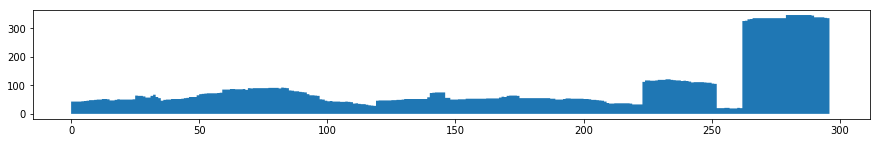

In [44]:
fig, ax = plt.subplots(figsize=(15, 2))
ax.fill_between(np.arange(cov.shape[0]), np.nan_to_num(cov), step='pre')

In [45]:
with open('metadata/sample_ids.txt', 'r') as fin:
    sample_ids = fin.read().split()

In [47]:
sample_ids[:5]

['10515058-A', '12402567-A', '13515292-A', '17402567-B', '249136-B']

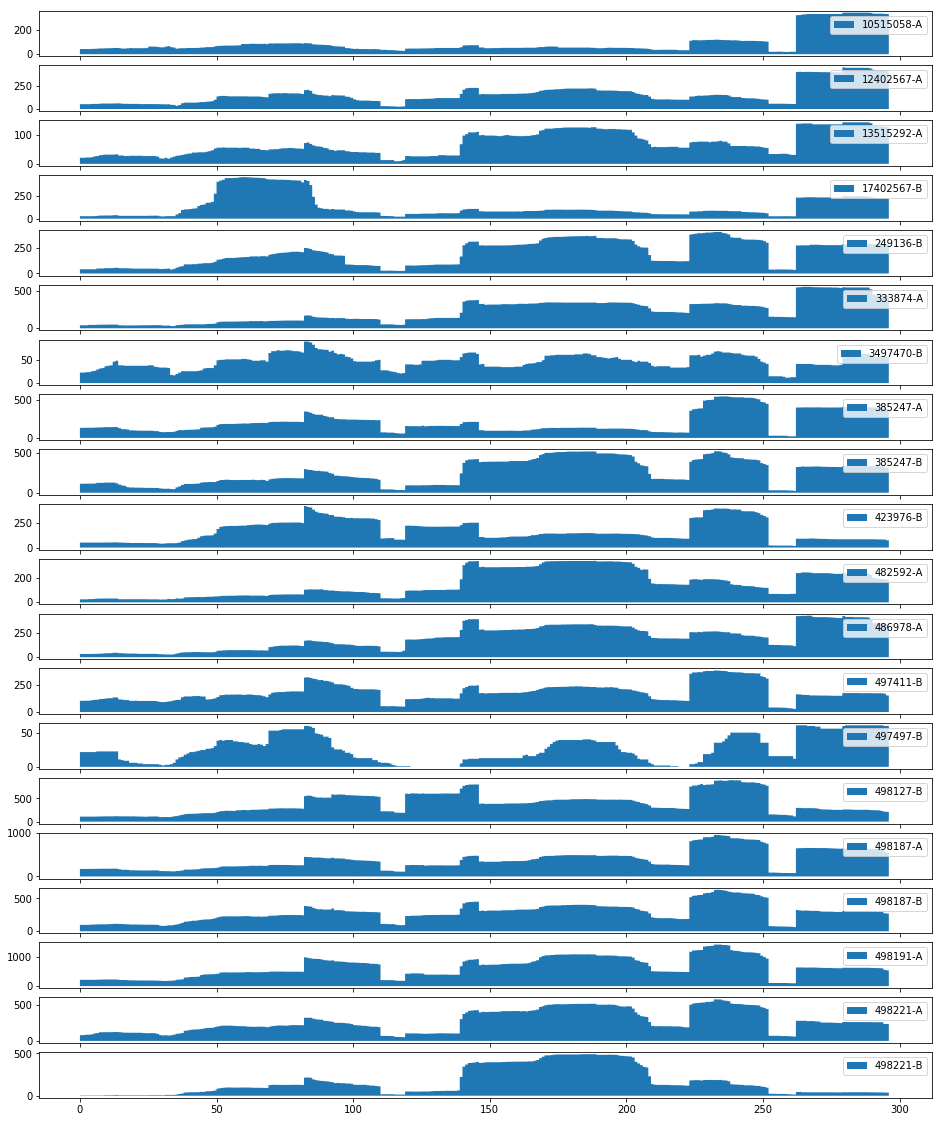

In [56]:
fig, axes = plt.subplots(20, 1, figsize=(16, 20), sharex=True, sharey=False)
for i, sample_id in enumerate(sample_ids[:20]):
    filename = 'output/genomecov/{}.+.bigWig'.format(sample_id)
    bw = BigWigFile(bytes(filename, encoding='ascii'))
    cov = bw.interval_query(b'chr14', 49586580, 49586878)
    axes[i].fill_between(np.arange(cov.shape[0]), np.nan_to_num(cov), step='pre', label=sample_id)
    axes[i].legend()
    bw.close()